In [77]:
from bbcpy.load.srm_eeg import *
import matplotlib.pyplot as plt
import numpy as np

module_path = os.path.abspath(os.path.join('../../bbcpy_AutoML/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from bokeh.io import output_notebook
output_notebook()

Loading BokehJS ...

In [59]:
subjects_info_path = '../local/metadata'
subject_group_path = list_all_files(subjects_info_path, pattern="*.json")

In [71]:
pvc_subject_mean_LR = {}
pvc_subject_mean_2D = {}
pvc_subject_sessions_LR = {}
pvc_subject_sessions_2D = {}

for subject_id, Subject_info_path in subject_group_path.items():
    
    pvc_subject_mean_LR[subject_id] = {}
    pvc_subject_sessions_LR[subject_id] = {}
    pvc_subject_mean_2D[subject_id] = {}
    pvc_subject_sessions_2D[subject_id] = {}
    
    tmp_subject_LR = []
    tmp_subject_2D = []
    
    Subject_info_dict = load_session_metadata(Subject_info_path)

    for session_id, stats in Subject_info_dict.items():
        
        pvc_session_valid_LR = stats["valid_pvc"]["LR"]
        tmp_subject_LR.append(pvc_session_valid_LR)
        pvc_subject_sessions_LR[subject_id][session_id] = pvc_session_valid_LR
        pvc_subject_mean_LR[subject_id] = np.mean(np.array(tmp_subject_LR))
        pvc_session_valid_2D = stats["valid_pvc"]["2D"]
        tmp_subject_2D.append(pvc_session_valid_2D)
        pvc_subject_sessions_2D[subject_id][session_id] = pvc_session_valid_2D
        pvc_subject_mean_2D[subject_id] = np.mean(np.array(tmp_subject_2D))

S1 ..\local\metadata\S1.json
S10 ..\local\metadata\S10.json
S11 ..\local\metadata\S11.json
S12 ..\local\metadata\S12.json
S13 ..\local\metadata\S13.json
S14 ..\local\metadata\S14.json
S15 ..\local\metadata\S15.json
S16 ..\local\metadata\S16.json
S17 ..\local\metadata\S17.json
S18 ..\local\metadata\S18.json
S19 ..\local\metadata\S19.json
S2 ..\local\metadata\S2.json
S20 ..\local\metadata\S20.json
S21 ..\local\metadata\S21.json
S22 ..\local\metadata\S22.json
S23 ..\local\metadata\S23.json
S24 ..\local\metadata\S24.json
S25 ..\local\metadata\S25.json
S26 ..\local\metadata\S26.json
S27 ..\local\metadata\S27.json
S28 ..\local\metadata\S28.json
S29 ..\local\metadata\S29.json
S3 ..\local\metadata\S3.json
S30 ..\local\metadata\S30.json
S31 ..\local\metadata\S31.json
S32 ..\local\metadata\S32.json
S33 ..\local\metadata\S33.json
S34 ..\local\metadata\S34.json
S35 ..\local\metadata\S35.json
S36 ..\local\metadata\S36.json
S38 ..\local\metadata\S38.json
S39 ..\local\metadata\S39.json
S4 ..\local\me

In [86]:
def plot_boxplot_pvc(pvc_subject_sessions, pvc_subject_mean, task_name, title):
    # Sorting the data into the three categories
    
    if task_name == "LR":
        category_1 = {k: v for k, v in pvc_subject_mean.items() if v > 0.8}
        category_2 = {k: v for k, v in pvc_subject_mean.items() if 0.7 <= v <= 0.8}
        category_3 = {k: v for k, v in pvc_subject_mean.items() if v < 0.7}
    elif task_name == "2D":
        category_1 = {k: v for k, v in pvc_subject_mean.items() if v > 0.5}
        category_2 = {k: v for k, v in pvc_subject_mean.items() if 0.4 <= v <= 0.5}
        category_3 = {k: v for k, v in pvc_subject_mean.items() if v < 0.4}
    


    # Sorting each category by their values
    sorted_category_1 = dict(sorted(category_1.items(), key=lambda item: item[1], reverse=True))
    sorted_category_2 = dict(sorted(category_2.items(), key=lambda item: item[1], reverse=True))
    sorted_category_3 = dict(sorted(category_3.items(), key=lambda item: item[1], reverse=True))

    C1_list = list(sorted_category_1.keys())
    print("C1_list", C1_list)
    C2_list = list(sorted_category_2.keys())
    print("C2_list", C2_list)
    C3_list = list(sorted_category_3.keys())
    print("C3_list", C3_list)
    
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))  # Create 3 subplots
    
    categories = [C1_list, C2_list, C3_list]
    category_labels = ['Category 1', 'Category 2', 'Category 3']
    
    for i, (C_list, ax, category_label) in enumerate(zip(categories, axs, category_labels)):
        
        # Sample nested dictionary
        data= {key: pvc_subject_sessions[key] for key in C_list if key in pvc_subject_sessions}
    
        # Extract values for each subject
        all_values = [list(subject_data.values()) for subject_data in data.values()]
    
        # Calculate means and standard deviations
        means = [np.mean(values) for values in all_values]
        std_devs = [np.std(values) for values in all_values]
    
        # Plotting
        bp = ax.boxplot(all_values, vert=True, patch_artist=True, showfliers=False)
        ax.set_xticklabels(data.keys())
        ax.set_ylabel('percent valid correct (PVC)')
        ax.set_title(f'{title} - {category_label}')
    
        # Coloring boxes
        colors = ['#D0DBEE', '#C2C4E2', '#EED4E5', '#D1E2F7', '#D4E5DE'] * (len(all_values) // 5 + 1)
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
    
        # Plot means as red diamonds
        ax.scatter(range(1, len(means) + 1), means, marker='D', color='red', s=60, zorder=5)
        
        # Display standard deviations
        for i, (mean, std_dev) in enumerate(zip(means, std_devs), start=1):
            ax.plot([i, i], [mean - std_dev, mean + std_dev], color='blue', lw=2.5, zorder=4)
        
    plt.tight_layout()
    plt.show()
    



C1_list ['S5', 'S60', 'S57', 'S39', 'S9', 'S49', 'S30', 'S51', 'S52', 'S8', 'S36', 'S20', 'S50', 'S4', 'S38', 'S2', 'S43', 'S28']
C2_list ['S29', 'S26', 'S23', 'S19', 'S53', 'S41', 'S35', 'S61', 'S45', 'S14', 'S15', 'S11', 'S25', 'S1']
C3_list ['S13', 'S10', 'S54', 'S32', 'S7', 'S58', 'S56', 'S48', 'S62', 'S34', 'S12', 'S33', 'S55', 'S22', 'S47', 'S16', 'S27', 'S18', 'S42', 'S31', 'S21', 'S24', 'S17', 'S6', 'S40', 'S3']


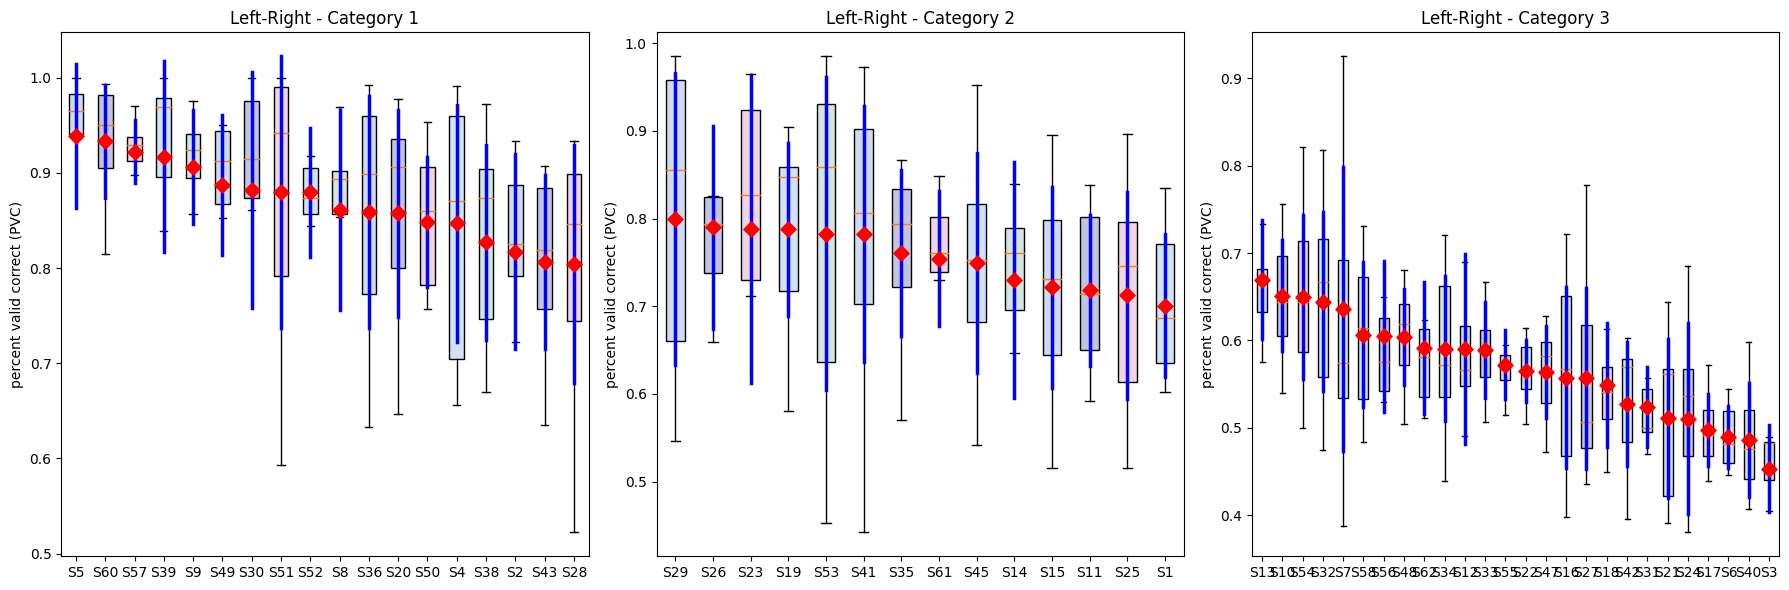

In [87]:
plot_boxplot_pvc(pvc_subject_sessions_LR, pvc_subject_mean_LR, "LR", "Left-Right")

C1_list ['S52', 'S51', 'S38', 'S39', 'S57', 'S9', 'S49', 'S30', 'S36', 'S20', 'S60', 'S4', 'S23', 'S28', 'S5', 'S8', 'S2', 'S29', 'S26', 'S1']
C2_list ['S53', 'S61', 'S14', 'S35', 'S54', 'S41', 'S45', 'S50', 'S11', 'S42', 'S25', 'S17', 'S32']
C3_list ['S13', 'S7', 'S43', 'S19', 'S15', 'S33', 'S12', 'S24', 'S3', 'S40', 'S55', 'S34', 'S10', 'S58', 'S16', 'S27', 'S18', 'S48', 'S31', 'S47', 'S6', 'S21', 'S56', 'S22', 'S62']


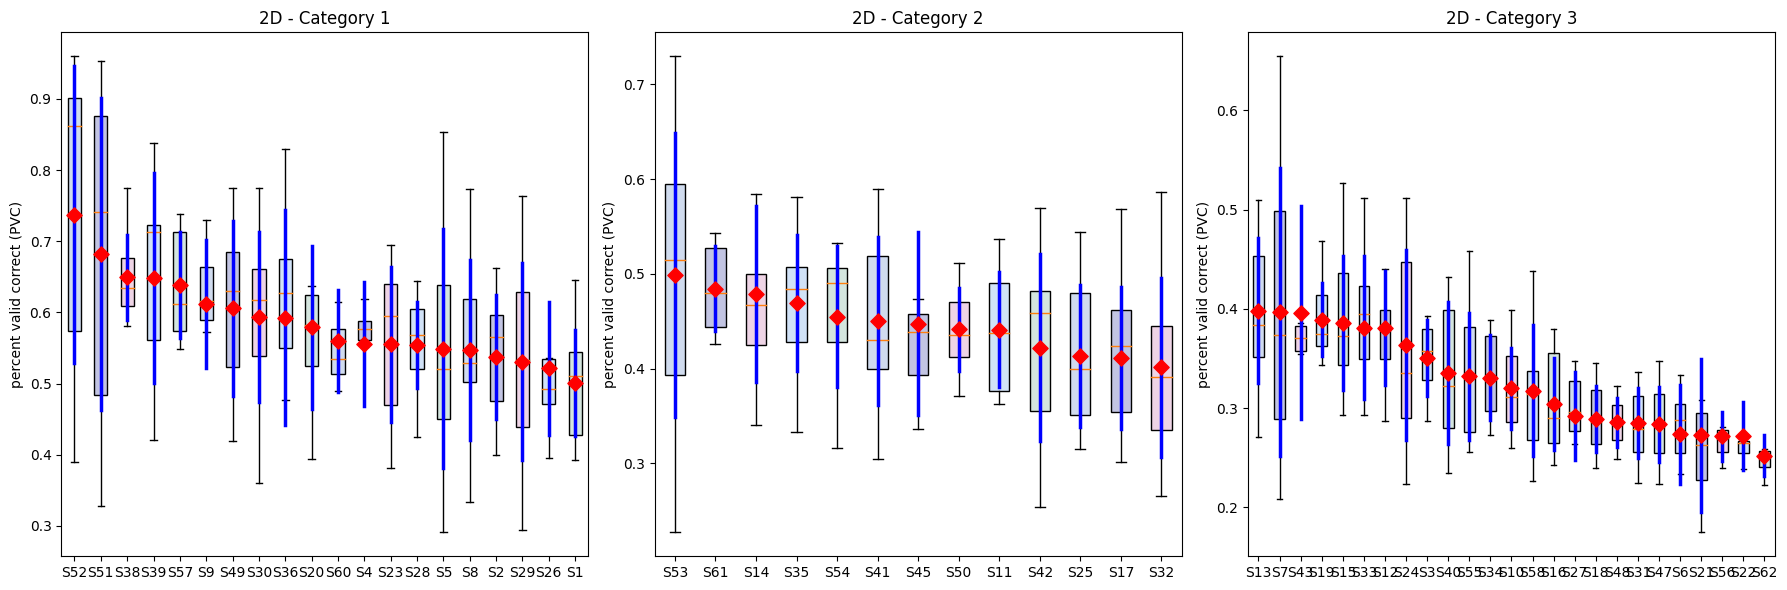

In [88]:
plot_boxplot_pvc(pvc_subject_sessions_2D, pvc_subject_mean_2D, "2D", "2D")

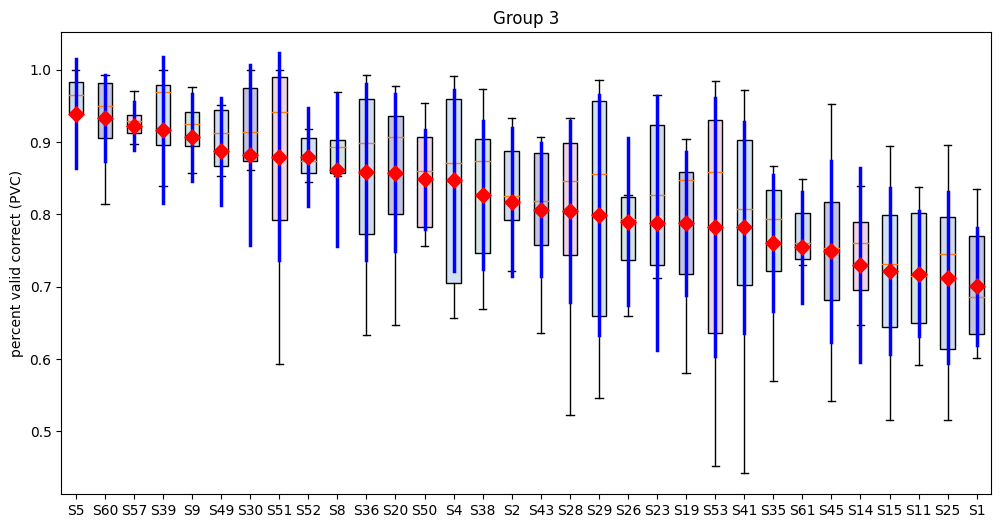

In [89]:
# Sorting the data into the three categories
category_1 = {k: v for k, v in pvc_subject_mean_LR.items() if v > 0.7}
category_2 = {k: v for k, v in pvc_subject_mean_LR.items() if 0.6 <= v <= 0.7}
category_3 = {k: v for k, v in pvc_subject_mean_LR.items() if v < 0.6}

# Sorting each category by their values
sorted_category_1 = dict(sorted(category_1.items(), key=lambda item: item[1], reverse=True))
sorted_category_2 = dict(sorted(category_2.items(), key=lambda item: item[1], reverse=True))
sorted_category_3 = dict(sorted(category_3.items(), key=lambda item: item[1], reverse=True))

C1_list = list(sorted_category_1.keys())


# Sample nested dictionary
data = {key: pvc_subject_sessions_LR[key] for key in C1_list if key in pvc_subject_sessions_LR}

# Extract values for each subject
all_values = [list(subject_data.values()) for subject_data in data.values()]

# Calculate means and standard deviations
means = [np.mean(values) for values in all_values]
std_devs = [np.std(values) for values in all_values]

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
bp = ax.boxplot(all_values, vert=True, patch_artist=True, showfliers=False)
ax.set_xticklabels(data.keys())
ax.set_ylabel('percent valid correct (PVC)')
ax.set_title('Group 3')

# Coloring boxes
colors = ['#D0DBEE', '#C2C4E2', '#EED4E5', '#D1E2F7', '#D4E5DE'] * (len(all_values) // 5 + 1)
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# Plot means as red diamonds
ax.scatter(range(1, len(means) + 1), means, marker='D', color='red', s=60, zorder=5)

# Display standard deviations
for i, (mean, std_dev) in enumerate(zip(means, std_devs), start=1):
    ax.plot([i, i], [mean - std_dev, mean + std_dev], color='blue', lw=2.5, zorder=4)

plt.show()

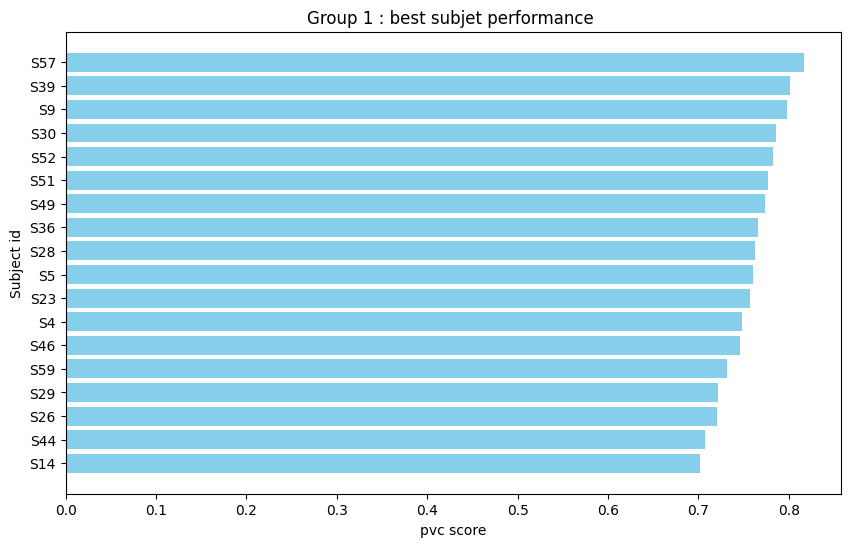

In [13]:
import matplotlib.pyplot as plt

# Daten für die Visualisierung vorbereiten
keys = list(sorted_category_1.keys())
values = list(sorted_category_1.values())

# Das Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.barh(keys, values, color='skyblue')
plt.xlabel('pvc score')
plt.ylabel('Subject id')
plt.title('Group 1 : best subjet performance ')
plt.gca().invert_yaxis()  # Sortiert die Balken von oben nach unten basierend auf den Werten
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Daten für die Visualisierung vorbereiten
keys = list(sorted_category_2.keys())
values = list(sorted_category_2.values())

# Das Balkendiagramm erstellen
plt.figure(figsize=(10, 6))
plt.barh(keys, values, color='skyblue')
plt.xlabel('pvc score')
plt.ylabel('Subject id')
plt.title('Group 2 : best subjet performance ')
plt.gca().invert_yaxis()  # Sortiert die Balken von oben nach unten basierend auf den Werten
plt.show()